In [1]:
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as ly
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
reviews = [
    'nice food',
    'amazing restaurant',
    'too good',
    'just loved it!',
    'will go again',
    'horrible food',
    'never go there',
    'poor service',
    'poor quality',
    'needs improvement'
]

In [4]:
sentiment = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [6]:
one_hot("amazing restaurant", 30)

[14, 27]

In [11]:
VOCAB_SIZE = 30
MAX_LENGTH = 4
EMBEDDED_VECTOR_SIZE = 5

In [9]:
encoded_reviews = [one_hot(d, VOCAB_SIZE) for d in reviews]
print(encoded_reviews)

[[8, 24], [14, 27], [23, 18], [27, 17, 15], [1, 1, 7], [5, 24], [16, 1, 23], [12, 10], [12, 12], [7, 8]]


In [10]:
padded_reviews = pad_sequences(encoded_reviews, maxlen=MAX_LENGTH, padding="post")
padded_reviews

array([[ 8, 24,  0,  0],
       [14, 27,  0,  0],
       [23, 18,  0,  0],
       [27, 17, 15,  0],
       [ 1,  1,  7,  0],
       [ 5, 24,  0,  0],
       [16,  1, 23,  0],
       [12, 10,  0,  0],
       [12, 12,  0,  0],
       [ 7,  8,  0,  0]])

In [19]:
model = Sequential([
    ly.Embedding(VOCAB_SIZE, EMBEDDED_VECTOR_SIZE, input_length=MAX_LENGTH, name="embedding"),
    ly.Flatten(),
    ly.Dense(1, activation="sigmoid")
])

In [20]:
X = padded_reviews
y = sentiment

In [21]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 5)              150       
_________________________________________________________________
flatten_1 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [22]:
his = model.fit(X, y, epochs=50, verbose=0)

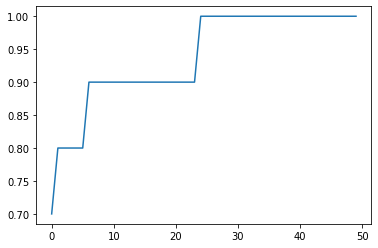

In [23]:
import matplotlib.pyplot as plt

plt.plot(his.history["accuracy"])
plt.show()

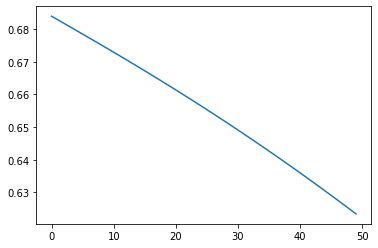

In [25]:
plt.plot(his.history["loss"])
plt.show()

In [26]:
loss, acc = model.evaluate(X, y)

1/1 [==============================] - 0s 3ms/step - loss: 0.6220 - accuracy: 1.0000


In [27]:
acc

1.0

In [28]:
weights = model.get_layer("embedding").get_weights()[0]
len(weights)

30

In [29]:
weights[13]

array([-0.00290029, -0.01196655,  0.02126468, -0.02347614,  0.04229366],
      dtype=float32)

In [30]:
weights[4]

array([-0.01279771,  0.01547458, -0.00126825, -0.03223559, -0.03267553],
      dtype=float32)

In [31]:
weights[16]

array([ 0.0985147 , -0.0960668 , -0.01766877, -0.08221646, -0.0971614 ],
      dtype=float32)